# 建筑数据语义丰富

综合数据源，根据地理空间位置，对建筑按照其所处用地功能进行分类，形成一个新的建筑数据shp文件。

# Wuhan_Buildings_Fine-Grained_Semantically_Enriched_Data_0228

我将帮助你使用Python代码来处理这两个shp文件，并进行空间连接以获得建筑物的用地功能分类信息。以下是完整的解决方案：



In [3]:
import geopandas as gpd
import pandas as pd

# 读取建筑物和用地功能数据
buildings = gpd.read_file(r'F:\ScientificDatabase\paper03\wuhan_district\Wuhan_Building_GloBFP_cleaned.shp')
landuse = gpd.read_file(r'F:\ScientificDatabase\paper03\wuhan_district\Wuhan_block_function_2018\wuhan_block_function.shp')

# 确保两个数据集使用相同的坐标系统
print("Buildings CRS:", buildings.crs)
print("Landuse CRS:", landuse.crs)

# 如果坐标系统不同，将landuse转换为与buildings相同的坐标系统
if buildings.crs != landuse.crs:
    landuse = landuse.to_crs(buildings.crs)

# 进行空间连接
buildings_with_landuse = gpd.sjoin(buildings, landuse, how='left', predicate='within')

# 选择需要保留的列
columns_to_keep = ['fid', 'Height', 'area', 'area_m2', 'area_class',  # 原有建筑物数据
                   'F_AREA', 'City_CODE', 'UUID', 'Level1', 'Level2', 
                   'Level1_cn', 'Level2_cn']

# 保留指定的列
result = buildings_with_landuse[columns_to_keep]

# 检查结果
print("\n数据概览：")
print(result.info())

# 检查空值情况
print("\n空值统计：")
print(result.isnull().sum())

# 保存结果
output_path = r'F:\ScientificDatabase\paper03\wuhan_district\Wuhan_buildings_with_landuse.shp'
result.to_file(output_path)

print(f"\n结果已保存至: {output_path}")

Buildings CRS: EPSG:32650
Landuse CRS: EPSG:4326

数据概览：
<class 'pandas.core.frame.DataFrame'>
Index: 982576 entries, 0 to 982575
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fid         982576 non-null  float64
 1   Height      982576 non-null  float64
 2   area        982576 non-null  float64
 3   area_m2     982576 non-null  float64
 4   area_class  982576 non-null  object 
 5   F_AREA      450149 non-null  float64
 6   City_CODE   450149 non-null  float64
 7   UUID        450149 non-null  float64
 8   Level1      450149 non-null  float64
 9   Level2      450149 non-null  float64
 10  Level1_cn   450149 non-null  object 
 11  Level2_cn   450149 non-null  object 
dtypes: float64(9), object(3)
memory usage: 97.5+ MB
None

空值统计：
fid                0
Height             0
area               0
area_m2            0
area_class         0
F_AREA        532427
City_CODE     532427
UUID          532427
Level1        532

AttributeError: 'DataFrame' object has no attribute 'to_file'



这段代码将：

1. 使用geopandas读取两个shp文件
2. 检查并确保两个数据集使用相同的坐标系统
3. 使用空间连接（spatial join）将建筑物与其所在的用地功能区域关联起来
4. 保留指定的属性列，包括：
   - 原有建筑物数据：fid、Height、area、area_m2、area_class
   - 用地功能数据：F_AREA、City_CODE、UUID、Level1、Level2、Level1_cn、Level2_cn
5. 将结果保存为新的shp文件

请注意以下几点：
1. 代码会自动处理坐标系统的一致性
2. 使用'left'连接确保保留所有建筑物记录
3. 代码会输出数据概览和空值统计，方便检查结果
4. 输出文件将保存在与原始数据相同的目录下

如果你遇到内存问题，可以考虑分批处理数据。如果需要检查特定区域或添加其他属性，也可以相应修改代码。

这个错误出现是因为在空间连接后，我们使用列选择操作 `buildings_with_landuse[columns_to_keep]` 时，返回的 `result` 变成了普通的 Pandas DataFrame，而不是 GeoDataFrame。因此无法使用 `to_file()` 方法保存为 shapefile。

以下是修复后的代码：



In [4]:
import geopandas as gpd
import pandas as pd

# 读取建筑物和用地功能数据
buildings = gpd.read_file(r'F:\ScientificDatabase\paper03\wuhan_district\Wuhan_Building_GloBFP_cleaned.shp')
landuse = gpd.read_file(r'F:\ScientificDatabase\paper03\wuhan_district\Wuhan_block_function_2018\wuhan_block_function.shp')

# 确保两个数据集使用相同的坐标系统
print("Buildings CRS:", buildings.crs)
print("Landuse CRS:", landuse.crs)

# 如果坐标系统不同，将landuse转换为与buildings相同的坐标系统
if buildings.crs != landuse.crs:
    landuse = landuse.to_crs(buildings.crs)

# 进行空间连接
buildings_with_landuse = gpd.sjoin(buildings, landuse, how='left', predicate='within')

# 选择需要保留的列（包括几何列）
columns_to_keep = ['fid', 'Height', 'area', 'area_m2', 'area_class',  # 原有建筑物数据
                   'F_AREA', 'City_CODE', 'UUID', 'Level1', 'Level2', 
                   'Level1_cn', 'Level2_cn', 'geometry']  # 添加 geometry 列

# 保留指定的列并确保结果是 GeoDataFrame
result = gpd.GeoDataFrame(buildings_with_landuse[columns_to_keep], 
                         geometry='geometry',
                         crs=buildings.crs)

# 检查结果
print("\n数据概览：")
print(result.info())

# 检查空值情况
print("\n空值统计：")
print(result.isnull().sum())

# 保存结果
output_path = r'F:\ScientificDatabase\paper03\wuhan_district\Wuhan_buildings_with_landuse.shp'
result.to_file(output_path)

print(f"\n结果已保存至: {output_path}")

Buildings CRS: EPSG:32650
Landuse CRS: EPSG:4326

数据概览：
<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 982576 entries, 0 to 982575
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   fid         982576 non-null  float64 
 1   Height      982576 non-null  float64 
 2   area        982576 non-null  float64 
 3   area_m2     982576 non-null  float64 
 4   area_class  982576 non-null  object  
 5   F_AREA      450149 non-null  float64 
 6   City_CODE   450149 non-null  float64 
 7   UUID        450149 non-null  float64 
 8   Level1      450149 non-null  float64 
 9   Level2      450149 non-null  float64 
 10  Level1_cn   450149 non-null  object  
 11  Level2_cn   450149 non-null  object  
 12  geometry    982576 non-null  geometry
dtypes: float64(9), geometry(1), object(3)
memory usage: 105.0+ MB
None

空值统计：
fid                0
Height             0
area               0
area_m2            0
area_class         0
F



主要修改点：

1. 在 `columns_to_keep` 中添加了 `'geometry'` 列
2. 使用 `gpd.GeoDataFrame()` 显式创建 GeoDataFrame，确保保留空间信息
3. 在创建 GeoDataFrame 时指定 `geometry` 列和 `crs`

这样修改后，结果数据将保持为 GeoDataFrame 格式，可以正常保存为 shapefile 文件。保存的文件将包含所有指定的属性列以及空间几何信息。

# 重写代码

In [5]:
# 路径 F:\ScientificDatabase\paper03\wuhan_district\Wuhan_Building_GloBFP_cleaned.shp 包含数据：fid Height area area_m2 area_class fid为建筑ID；Height表示建筑高度

# 路径 F:\ScientificDatabase\paper03\wuhan_district\Wuhan_block_function_2018\wuhan_block_function.shp

# 综合上述两个数据源，根据地理空间位置，对建筑按照其所处于的一级和二级用地功能进行分类，形成一个新的建筑数据shp文件。

# 用地类型分为两类，请都保留。一级分类列名为Level1_cn，二级分类的列名为Level2_cn，同时保留原有的建筑shp内的全部数据，尽可能丰富土地利用shp的数据到建筑shp文件中，使得每个建筑数据的属性除原有的内容外，还包含F_AREA City_CODE UUID Level1 Level2 Level1_cn Level2_cn 这些。

## 读取建筑物数据

In [6]:
import geopandas as gpd

# 读取建筑物数据
buildings_path = r'F:\ScientificDatabase\paper03\wuhan_district\Wuhan_Building_GloBFP_cleaned.shp'
buildings = gpd.read_file(buildings_path)

# 显示数据基本信息
print("数据基本信息：")
print(buildings.info())

print("\n前5行数据：")
print(buildings.head())

print("\n数据统计描述：")
print(buildings.describe())

print("\n坐标参考系统：")
print(buildings.crs)

# 检查是否有空值
print("\n空值统计：")
print(buildings.isnull().sum())

数据基本信息：
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 982576 entries, 0 to 982575
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   fid         982576 non-null  float64 
 1   Height      982576 non-null  float64 
 2   area        982576 non-null  float64 
 3   area_m2     982576 non-null  float64 
 4   area_class  982576 non-null  object  
 5   geometry    982576 non-null  geometry
dtypes: float64(4), geometry(1), object(1)
memory usage: 45.0+ MB
None

前5行数据：
   fid     Height  area  area_m2 area_class  \
0  3.0   5.323284   0.0    89.93     小于100㎡   
1  4.0   5.845297   0.0   107.93   100-500㎡   
2  5.0  10.932634   0.0   472.19   100-500㎡   
3  6.0   5.512731   0.0   107.93   100-500㎡   
4  8.0   8.414306   0.0    53.96     小于100㎡   

                                            geometry  
0  POLYGON Z ((240554.453 3469594.077 0, 240562.8...  
1  POLYGON Z ((238708.98 3469634.906 0, 238704.03...  
2  

## 读取土地利用数据

In [7]:
# 读取土地利用数据
landuse_path = r'F:\ScientificDatabase\paper03\wuhan_district\Wuhan_block_function_2018\wuhan_block_function.shp'
landuse = gpd.read_file(landuse_path)

print("\n====== 土地利用数据信息 ======")
print("\n数据基本信息：")
print(landuse.info())

print("\n前5行数据：")
print(landuse.head())

print("\n数据统计描述：")
print(landuse.describe())

print("\n坐标参考系统：")
print(landuse.crs)

print("\n空值统计：")
print(landuse.isnull().sum())

# 显示唯一的土地利用类型
print("\n一级用地类型（Level1_cn）统计：")
print(landuse['Level1_cn'].value_counts())

print("\n二级用地类型（Level2_cn）统计：")
print(landuse['Level2_cn'].value_counts())


====== 土地利用数据信息 ======

数据基本信息：
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4736 entries, 0 to 4735
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Lon        4736 non-null   float64 
 1   Lat        4736 non-null   float64 
 2   F_AREA     4736 non-null   float64 
 3   City_CODE  4736 non-null   int64   
 4   UUID       4736 non-null   int64   
 5   Level1     4736 non-null   int64   
 6   Level2     4736 non-null   int64   
 7   Level1_cn  4736 non-null   object  
 8   Level2_cn  4736 non-null   object  
 9   geometry   4736 non-null   geometry
dtypes: float64(3), geometry(1), int64(4), object(2)
memory usage: 370.1+ KB
None

前5行数据：
         Lon       Lat     F_AREA  City_CODE    UUID  Level1  Level2  \
0  114.60989  30.45637   0.007575     420100   71133       5     505   
1  114.64108  30.47150   1.098264     420100   71135       1     101   
2  114.66962  30.54718  10.353669     420100   71159  

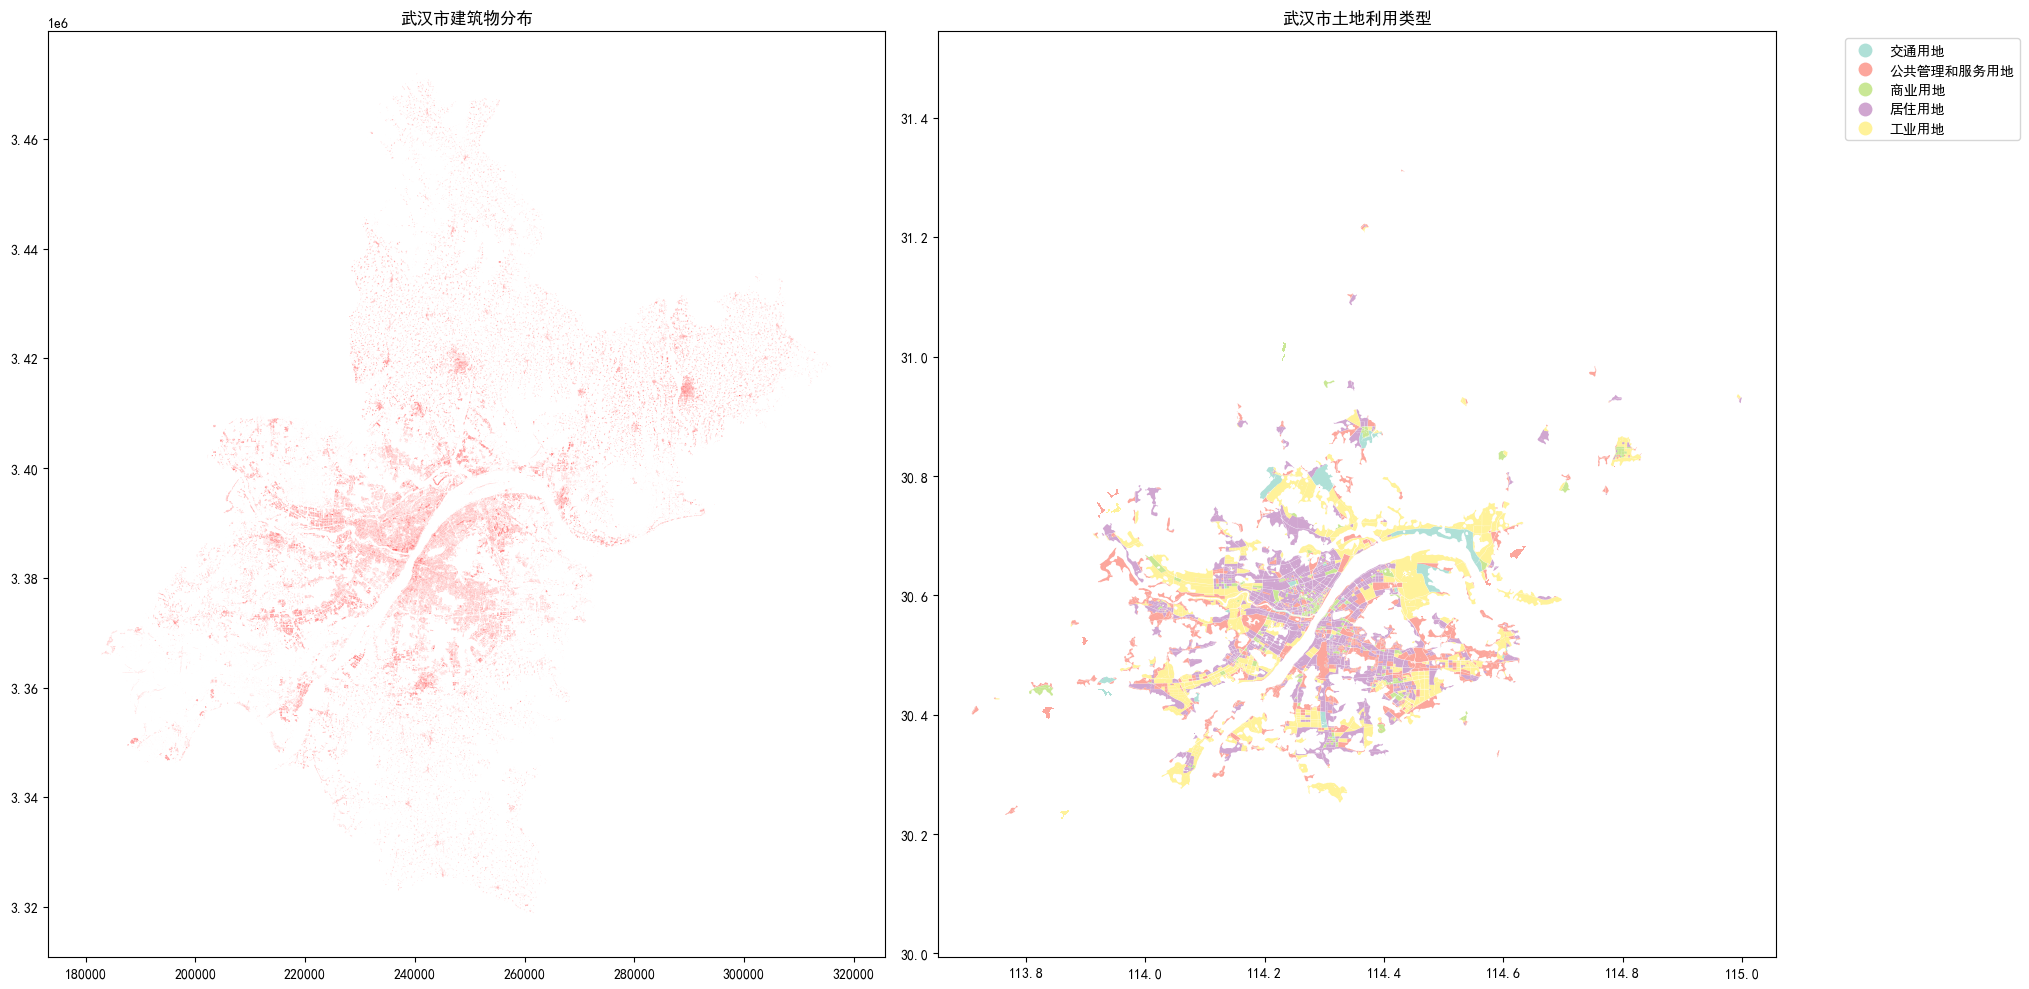

<Figure size 1500x1500 with 0 Axes>

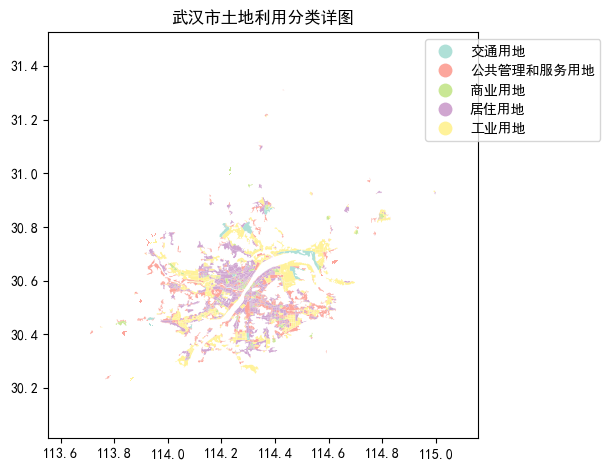

In [8]:
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

# 创建一个包含两个子图的图形
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# 绘制建筑物数据
buildings.plot(ax=ax1, color='red', alpha=0.5)
ax1.set_title('武汉市建筑物分布')
ax1.axis('equal')

# 绘制土地利用数据（按一级用地类型着色）
landuse.plot(ax=ax2, column='Level1_cn', legend=True, 
            legend_kwds={'bbox_to_anchor': (1.3, 1)},
            cmap='Set3', alpha=0.7)
ax2.set_title('武汉市土地利用类型')
ax2.axis('equal')

# 调整布局以确保图例完全显示
plt.tight_layout()

# 显示图形
plt.show()

# 创建单独的土地利用详细图
plt.figure(figsize=(15, 15))
landuse.plot(column='Level1_cn', legend=True,
            legend_kwds={'bbox_to_anchor': (1.3, 1)},
            cmap='Set3', alpha=0.7)
plt.title('武汉市土地利用分类详图')
plt.axis('equal')
plt.tight_layout()
plt.show()

建筑物数据CRS: EPSG:32650
土地利用数据CRS: EPSG:4326

分类后的建筑数据概览：
<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 982576 entries, 0 to 982575
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   fid          982576 non-null  float64 
 1   Height       982576 non-null  float64 
 2   area         982576 non-null  float64 
 3   area_m2      982576 non-null  float64 
 4   area_class   982576 non-null  object  
 5   geometry     982576 non-null  geometry
 6   index_right  450149 non-null  float64 
 7   Level1_cn    450149 non-null  object  
 8   Level2_cn    450149 non-null  object  
dtypes: float64(5), geometry(1), object(3)
memory usage: 75.0+ MB
None

一级用地类型分布：
Level1_cn
居住用地         194933
工业用地         119679
公共管理和服务用地     84263
商业用地          33787
交通用地          17487
Name: count, dtype: int64

二级用地类型分布：
Level2_cn
居住用地       194933
工业用地       119679
商业服务用地      28025
教育科研用地      26023
行政办公用地      20665
公园与绿地用地     18788
机

C:\Users\asus\AppData\Local\Temp\ipykernel_42800\2212103195.py:32: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  buildings_classified.to_file(output_path)
C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'index_right' to 'index_righ'
  ogr_write(



结果已保存至: F:\ScientificDatabase\paper03\wuhan_district\Wuhan_buildings_classified_2levels.shp


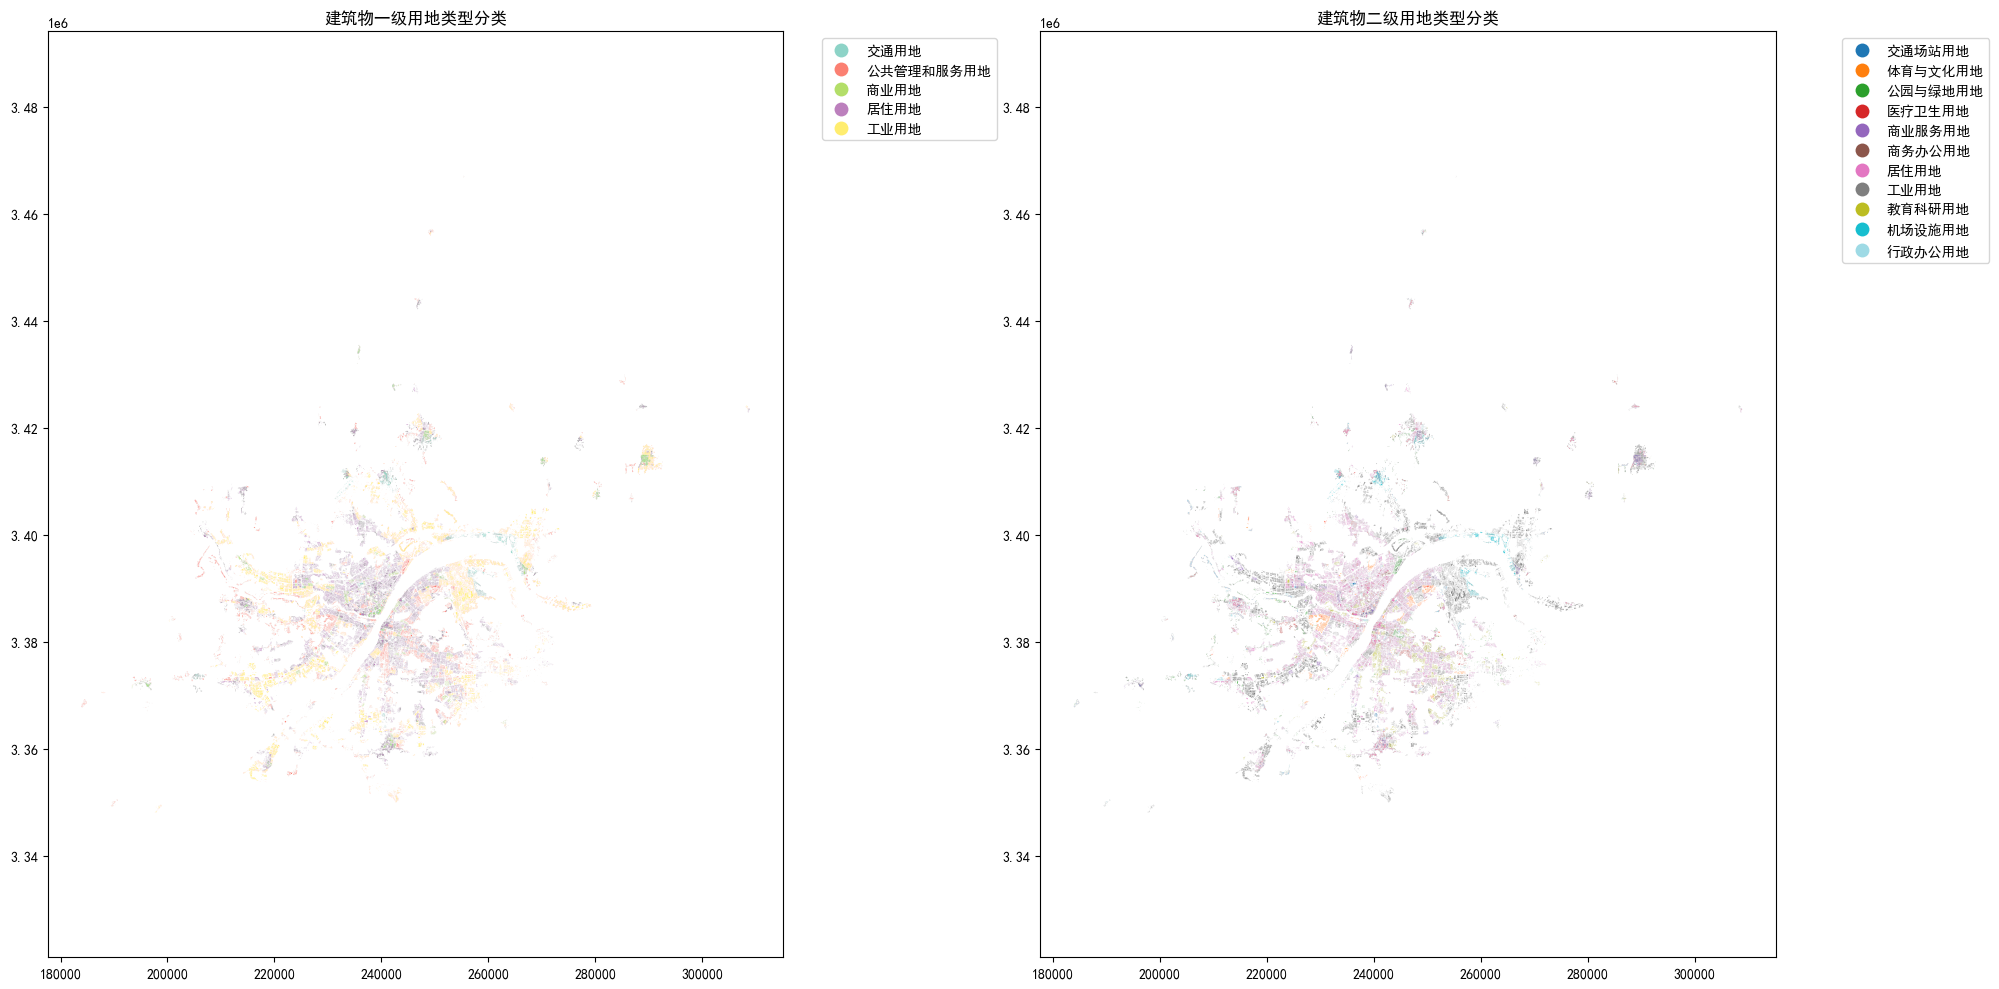

In [9]:
import geopandas as gpd
import pandas as pd

# 确保两个数据集使用相同的坐标系统
print("建筑物数据CRS:", buildings.crs)
print("土地利用数据CRS:", landuse.crs)

# 如果坐标系统不同，将土地利用数据转换为与建筑物数据相同的坐标系统
if buildings.crs != landuse.crs:
    landuse = landuse.to_crs(buildings.crs)

# 进行空间连接
buildings_classified = gpd.sjoin(buildings, landuse[['Level1_cn', 'Level2_cn', 'geometry']], 
                               how='left', predicate='within')

# 检查结果
print("\n分类后的建筑数据概览：")
print(buildings_classified.info())

# 检查分类结果统计
print("\n一级用地类型分布：")
print(buildings_classified['Level1_cn'].value_counts())
print("\n二级用地类型分布：")
print(buildings_classified['Level2_cn'].value_counts())

# 检查未分类的建筑（如果有）
unclassified = buildings_classified[buildings_classified['Level1_cn'].isna()]
print(f"\n未分类建筑数量：{len(unclassified)}")

# 保存结果
output_path = r'F:\ScientificDatabase\paper03\wuhan_district\Wuhan_buildings_classified_2levels.shp'
buildings_classified.to_file(output_path)

print(f"\n结果已保存至: {output_path}")

# 可视化分类结果
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 创建两个子图，分别显示一级和二级分类结果
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# 绘制一级分类结果
buildings_classified.plot(column='Level1_cn', legend=True,
                        legend_kwds={'bbox_to_anchor': (1.3, 1)},
                        ax=ax1, cmap='Set3')
ax1.set_title('建筑物一级用地类型分类')
ax1.axis('equal')

# 绘制二级分类结果
buildings_classified.plot(column='Level2_cn', legend=True,
                        legend_kwds={'bbox_to_anchor': (1.3, 1)},
                        ax=ax2, cmap='tab20')
ax2.set_title('建筑物二级用地类型分类')
ax2.axis('equal')

plt.tight_layout()
plt.show()


数据合并后的基本信息：
<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 982576 entries, 0 to 982575
Data columns (total 16 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   fid          982576 non-null  float64 
 1   Height       982576 non-null  float64 
 2   area         982576 non-null  float64 
 3   area_m2      982576 non-null  float64 
 4   area_class   982576 non-null  object  
 5   geometry     982576 non-null  geometry
 6   index_right  450149 non-null  float64 
 7   Lon          450149 non-null  float64 
 8   Lat          450149 non-null  float64 
 9   F_AREA       450149 non-null  float64 
 10  City_CODE    450149 non-null  float64 
 11  UUID         450149 non-null  float64 
 12  Level1       450149 non-null  float64 
 13  Level2       450149 non-null  float64 
 14  Level1_cn    450149 non-null  object  
 15  Level2_cn    450149 non-null  object  
dtypes: float64(12), geometry(1), object(3)
memory usage: 127.4+ MB
None

空值统计：
f

C:\Users\asus\AppData\Local\Temp\ipykernel_42800\1532707821.py:33: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  buildings_enriched.to_file(output_path)
C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\pyogrio\raw.py:709: RuntimeWarning: Normalized/laundered field name: 'index_right' to 'index_righ'
  ogr_write(



结果已保存至: F:\ScientificDatabase\paper03\wuhan_district\Wuhan_Buildings_Fine-Grained_Semantically_Enriched_Data_0228.shp


C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\geopandas\plotting.py:956: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\geopandas\plotting.py:956: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from current font.
  ax.figure.canvas.draw_idle()
C:\Users\asus\AppData\Roaming\Python\Python311\site-packages\geopandas\plotting.py:956: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from current font.
  ax.figure.canvas.draw_idle()
c:\Users\asus\.conda\envs\pytorch_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


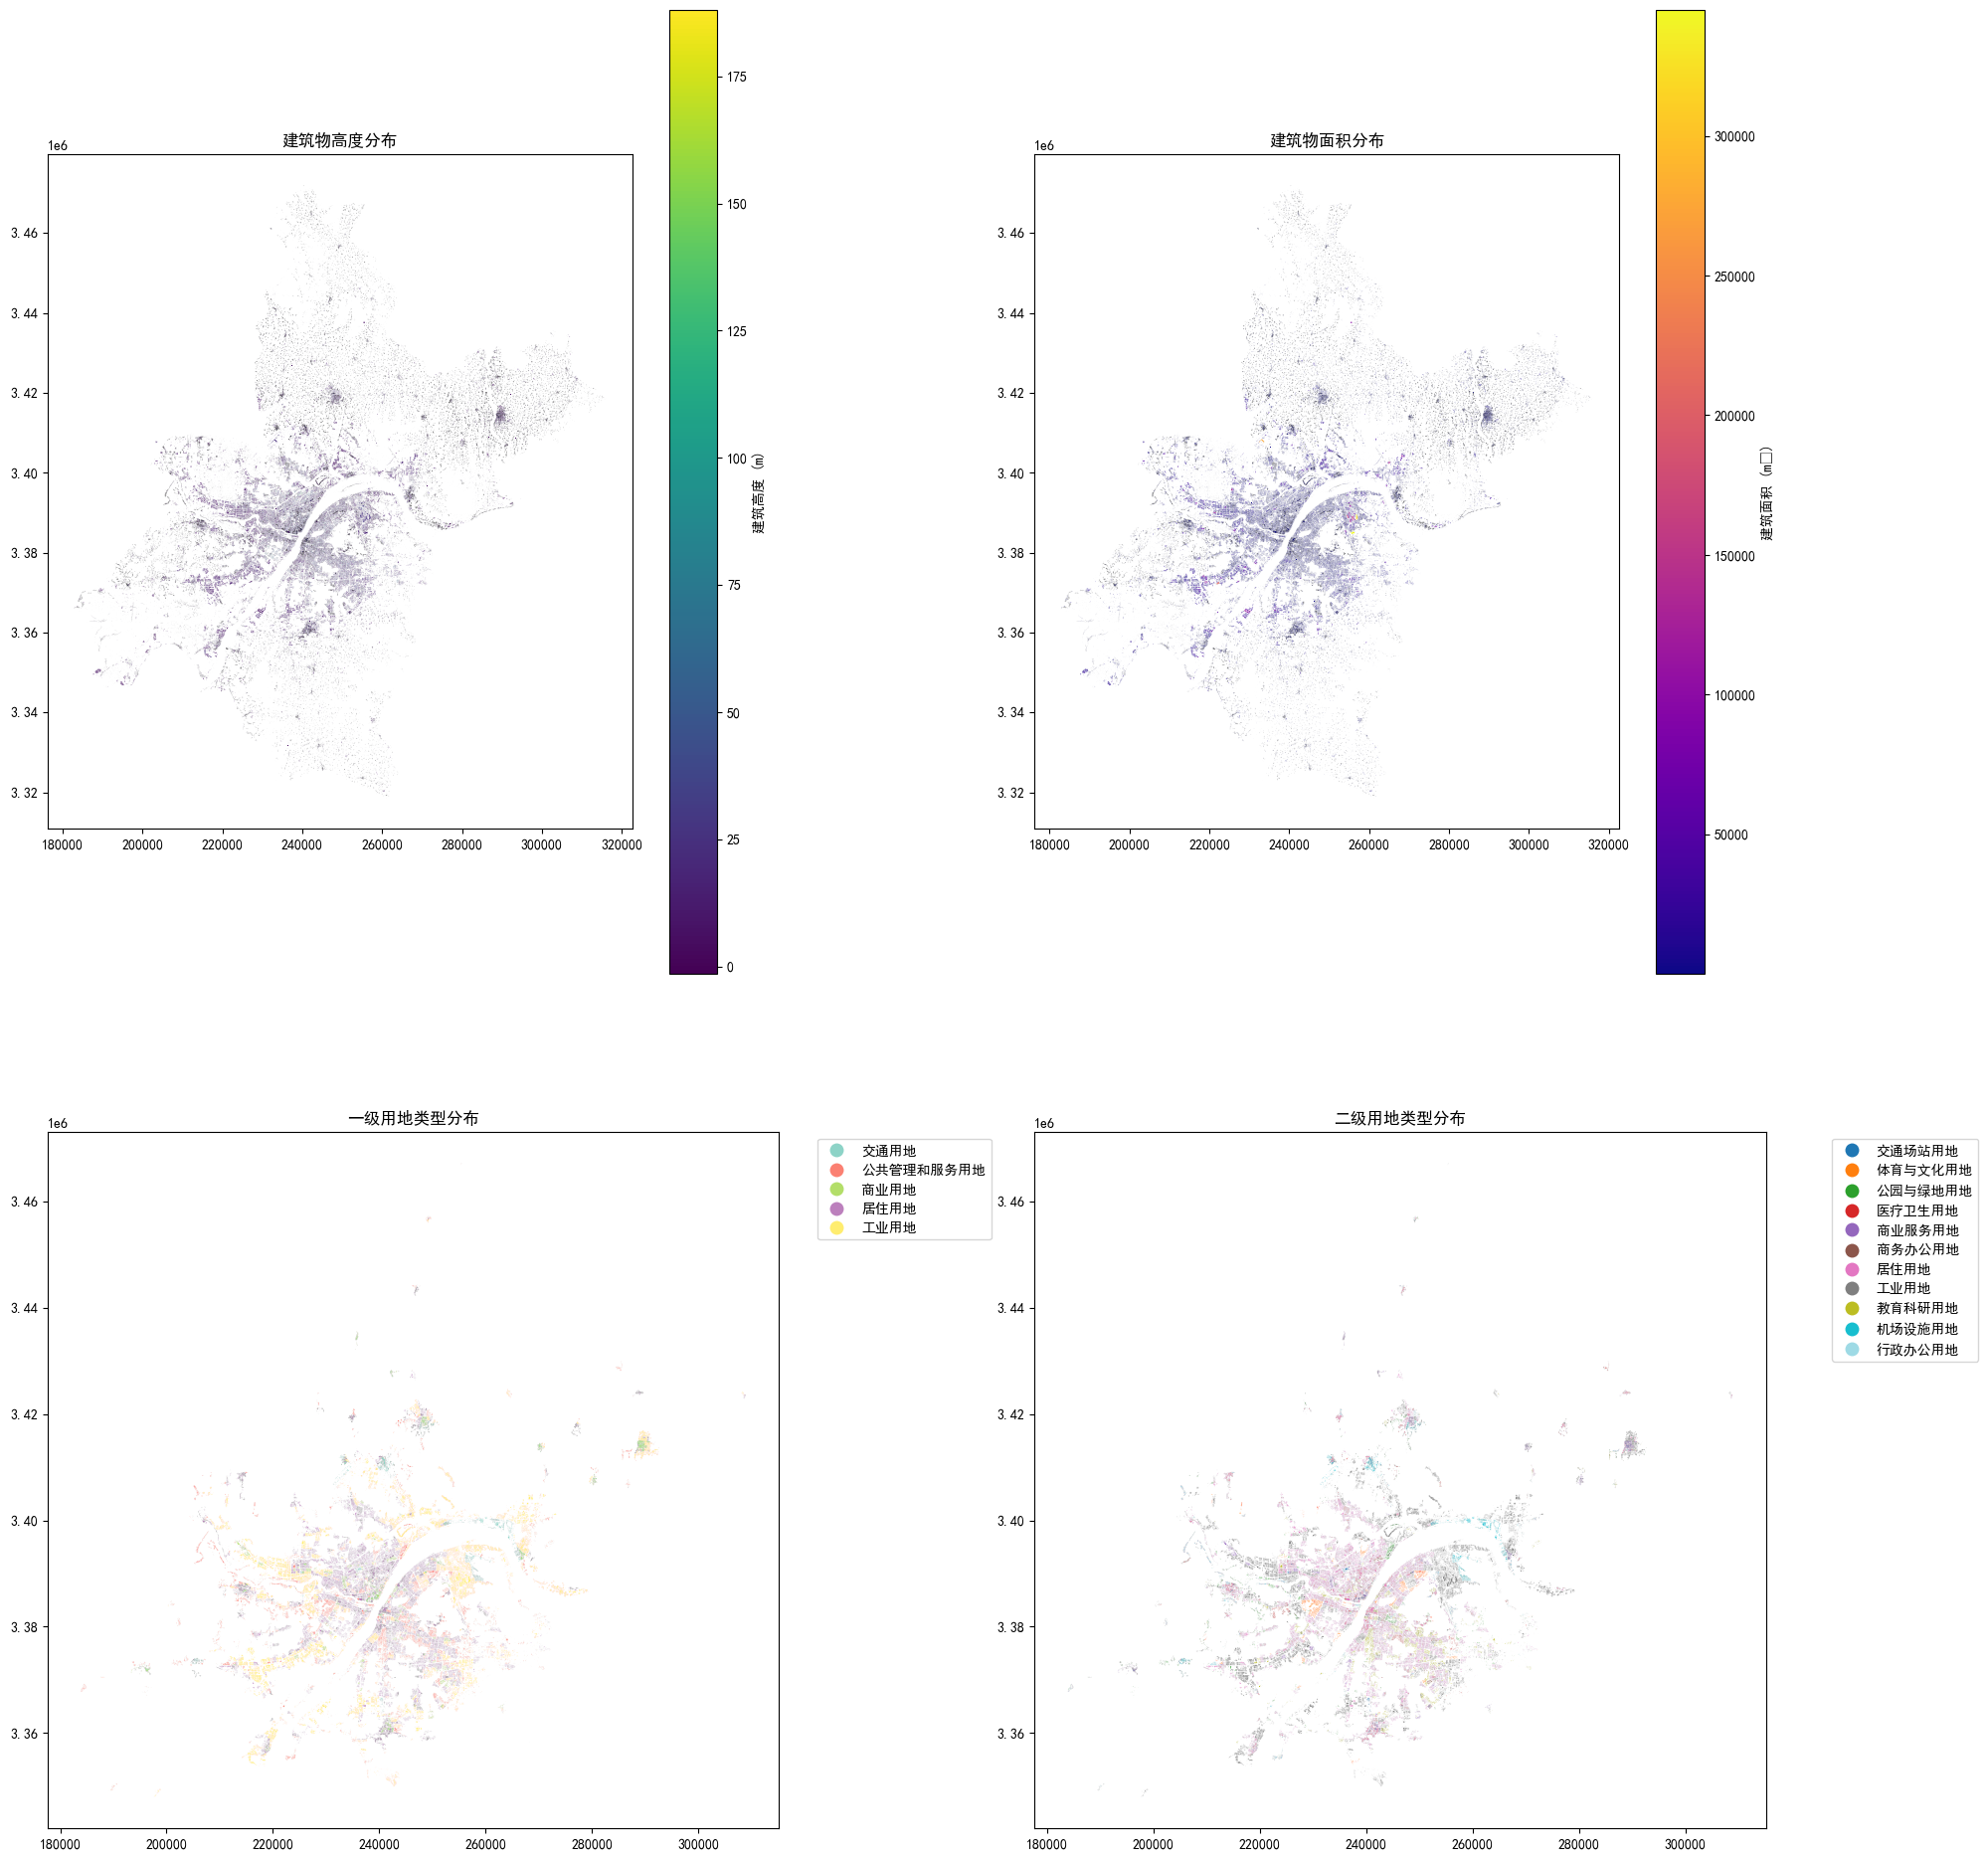


数据统计概要：

建筑物高度统计(米)：
count    982576.000000
mean          9.555733
std           7.305912
min          -1.429694
25%           5.886958
50%           7.445006
75%          10.568981
max         188.094740
Name: Height, dtype: float64

建筑物面积统计(平方米)：
count    982576.000000
mean        291.822370
std        1373.138907
min          20.000000
25%          59.190000
50%         107.990000
75%         235.760000
max      345123.090000
Name: area_m2, dtype: float64

各类型建筑物数量统计：

按一级用地类型：
           Height                      area_m2                  
            count   mean   min     max    mean    min        max
Level1_cn                                                       
交通用地        17487  10.09 -0.93  163.51  369.89  20.18   76296.26
公共管理和服务用地   84263  10.68 -1.28  168.28  309.35  20.01   74979.06
商业用地        33787  13.80 -1.36  169.31  317.39  20.00   60088.98
居住用地       194933  13.63 -1.41  188.09  314.60  20.00   64240.85
工业用地       119679  10.47 -1.39  158.80  615.96  20.00  327

In [10]:
import geopandas as gpd
import pandas as pd

# 确保两个数据集使用相同的坐标系统
if buildings.crs != landuse.crs:
    landuse = landuse.to_crs(buildings.crs)

# 进行空间连接，包含所需的所有属性
buildings_enriched = gpd.sjoin(
    buildings,
    landuse[['Lon', 'Lat', 'F_AREA', 'City_CODE', 'UUID', 
             'Level1', 'Level2', 'Level1_cn', 'Level2_cn', 'geometry']],
    how='left',
    predicate='within'
)

# 检查结果
print("\n数据合并后的基本信息：")
print(buildings_enriched.info())

# 检查空值情况
print("\n空值统计：")
print(buildings_enriched.isnull().sum())

# 检查分类结果
print("\n一级用地类型分布：")
print(buildings_enriched['Level1_cn'].value_counts())
print("\n二级用地类型分布：")
print(buildings_enriched['Level2_cn'].value_counts())

# 保存结果
output_path = r'F:\ScientificDatabase\paper03\wuhan_district\Wuhan_Buildings_Fine-Grained_Semantically_Enriched_Data_0228.shp'
buildings_enriched.to_file(output_path)

print(f"\n结果已保存至: {output_path}")

# 数据可视化
import matplotlib.pyplot as plt

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

# 创建多个子图展示不同属性
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))

# 1. 建筑物高度分布
buildings_enriched.plot(column='Height', legend=True,
                       legend_kwds={'label': '建筑高度 (m)'},
                       ax=ax1, cmap='viridis')
ax1.set_title('建筑物高度分布')

# 2. 建筑物面积分布
buildings_enriched.plot(column='area_m2', legend=True,
                       legend_kwds={'label': '建筑面积 (m²)'},
                       ax=ax2, cmap='plasma')
ax2.set_title('建筑物面积分布')

# 3. 一级用地类型分布
buildings_enriched.plot(column='Level1_cn', legend=True,
                       legend_kwds={'bbox_to_anchor': (1.3, 1)},
                       ax=ax3, cmap='Set3')
ax3.set_title('一级用地类型分布')

# 4. 二级用地类型分布
buildings_enriched.plot(column='Level2_cn', legend=True,
                       legend_kwds={'bbox_to_anchor': (1.3, 1)},
                       ax=ax4, cmap='tab20')
ax4.set_title('二级用地类型分布')

# 调整布局
plt.tight_layout()
plt.show()

# 输出一些基本统计信息
print("\n数据统计概要：")
print("\n建筑物高度统计(米)：")
print(buildings_enriched['Height'].describe())

print("\n建筑物面积统计(平方米)：")
print(buildings_enriched['area_m2'].describe())

print("\n各类型建筑物数量统计：")
print("\n按一级用地类型：")
level1_stats = buildings_enriched.groupby('Level1_cn').agg({
    'Height': ['count', 'mean', 'min', 'max'],
    'area_m2': ['mean', 'min', 'max']
}).round(2)
print(level1_stats)